# <span style="color: blue;"><h2>Evaluation Metrics used in Machine Learning</h2></span>


In [ ]:
# Today we work on Heart Failure Prediction Dataset

<div style="color: darkred;"><h2>Evaluation Metrics Used in This Project:</h2></div>

1. <span style="color: navy;"><b>Confusion Matrix</b></span>  
2. <span style="color: darkgreen;"><b>Classification Report</b></span>  
3. <span style="color: navy;"><b>Classification Accuracy</b></span>  
4. <span style="color: darkgreen;"><b>Classification Error</b></span>  
5. <span style="color: navy;"><b>Precision</b></span>  
6. <span style="color: darkgreen;"><b>Recall</b></span>  
7. <span style="color: navy;"><b>True Positive Rate</b></span>  
8. <span style="color: darkgreen;"><b>False Positive Rate</b></span>  
9. <span style="color: navy;"><b>Specificity</b></span>  
10. <span style="color: darkgreen;"><b>Sensitivity</b></span>  
11. <span style="color: navy;"><b>F1 Score</b></span>  
12. <span style="color: darkgreen;"><b>Support</b></span>  
13. <span style="color: navy;"><b>ROC Curve</b></span>  
14. <span style="color: darkgreen;"><b>Precision-Recall Curve</b></span>  


# Library Importing

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import recall_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [4]:
heart = pd.read_csv('heart.csv')
heart.head().style.set_properties(**{'background-color': 'gray',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


<div style="color: darkred;"><h2>Attributes:</h2></div>

<div style="color: navy;"><b>Age:</b></div>  
<div style="color: darkgreen;">Age of the patient [years]</div>  

<div style="color: navy;"><b>Sex:</b></div>  
<div style="color: darkgreen;">Sex of the patient [<b>M:</b> Male, <b>F:</b> Female]</div>  

<div style="color: navy;"><b>ChestPainType:</b></div>  
<div style="color: darkgreen;">Chest Pain Type [<b>TA:</b> Typical Angina, <b>ATA:</b> Atypical Angina, <b>NAP:</b> Non-Anginal Pain, <b>ASY:</b> Asymptomatic]</div>  

<div style="color: navy;"><b>RestingBP:</b></div>  
<div style="color: darkgreen;">Resting blood pressure [mm Hg]</div>  

<div style="color: navy;"><b>Cholesterol:</b></div>  
<div style="color: darkgreen;">Serum cholesterol [mm/dl]</div>  

<div style="color: navy;"><b>FastingBS:</b></div>  
<div style="color: darkgreen;">Fasting blood sugar [<b>1:</b> if FastingBS > 120 mg/dl, <b>0:</b> otherwise]</div>  

<div style="color: navy;"><b>RestingECG:</b></div>  
<div style="color: darkgreen;">Resting electrocardiogram results [<b>Normal:</b> Normal, <b>ST:</b> ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), <b>LVH:</b> Left ventricular hypertrophy by Estes' criteria]</div>  

<div style="color: navy;"><b>MaxHR:</b></div>  
<div style="color: darkgreen;">Maximum heart rate achieved [Numeric value between 60 and 202]</div>  

<div style="color: navy;"><b>ExerciseAngina:</b></div>  
<div style="color: darkgreen;">Exercise-induced angina [<b>Y:</b> Yes, <b>N:</b> No]</div>  

<div style="color: navy;"><b>Oldpeak:</b></div>  
<div style="color: darkgreen;">Oldpeak = ST [Numeric value measured in depression]</div>  

<div style="color: navy;"><b>ST_Slope:</b></div>  
<div style="color: darkgreen;">The slope of the peak exercise ST segment [<b>Up:</b> upsloping, <b>Flat:</b> flat, <b>Down:</b> downsloping]</div>  

<div style="color: navy;"><b>HeartDisease:</b></div>  
<div style="color: darkgreen;">Output class [<b>1:</b> heart disease, <b>0:</b> Normal]</div>  


In [8]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


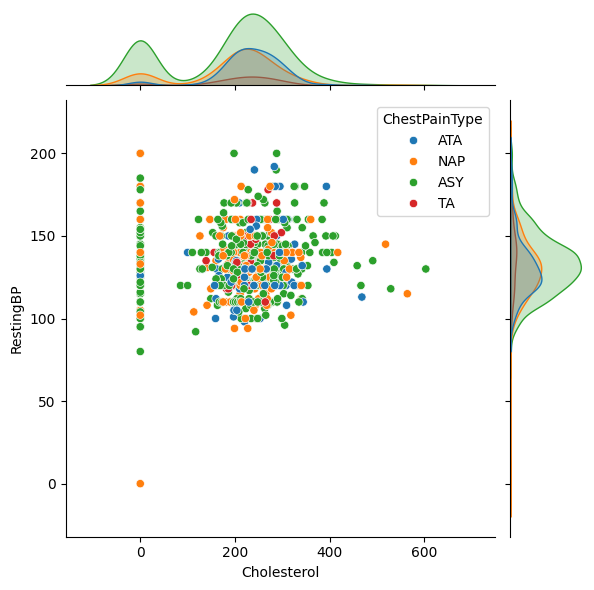

In [11]:
## Combining multiple views on the data

sns.jointplot(data=heart, x="Cholesterol", y="RestingBP", hue="ChestPainType");

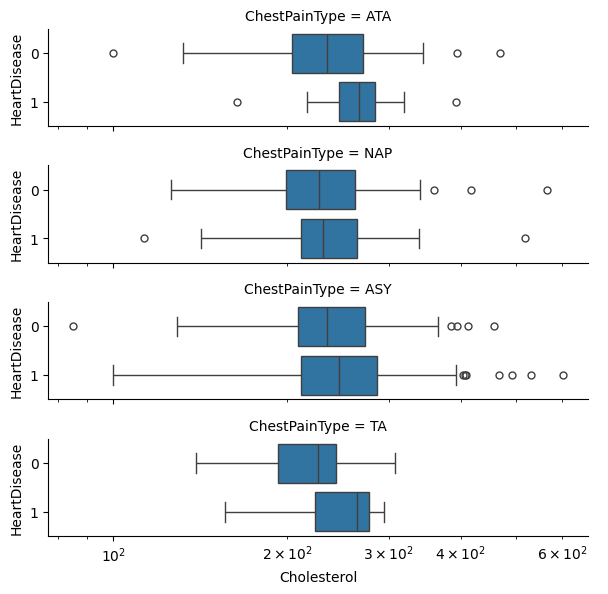

In [12]:
g = sns.catplot(x="Cholesterol", y="HeartDisease", row="ChestPainType",
                kind="box", orient="h", height=1.5, aspect=4,
                data=heart.query("Cholesterol > 0"))
g.set(xscale="log");

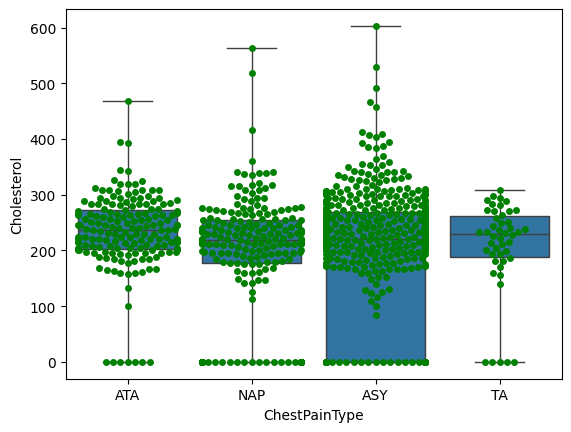

In [5]:
sns.boxplot(y="Cholesterol", x="ChestPainType", data=heart, whis=np.inf)
sns.swarmplot(y="Cholesterol",x="ChestPainType", data=heart, color="g");

In [14]:
heart.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

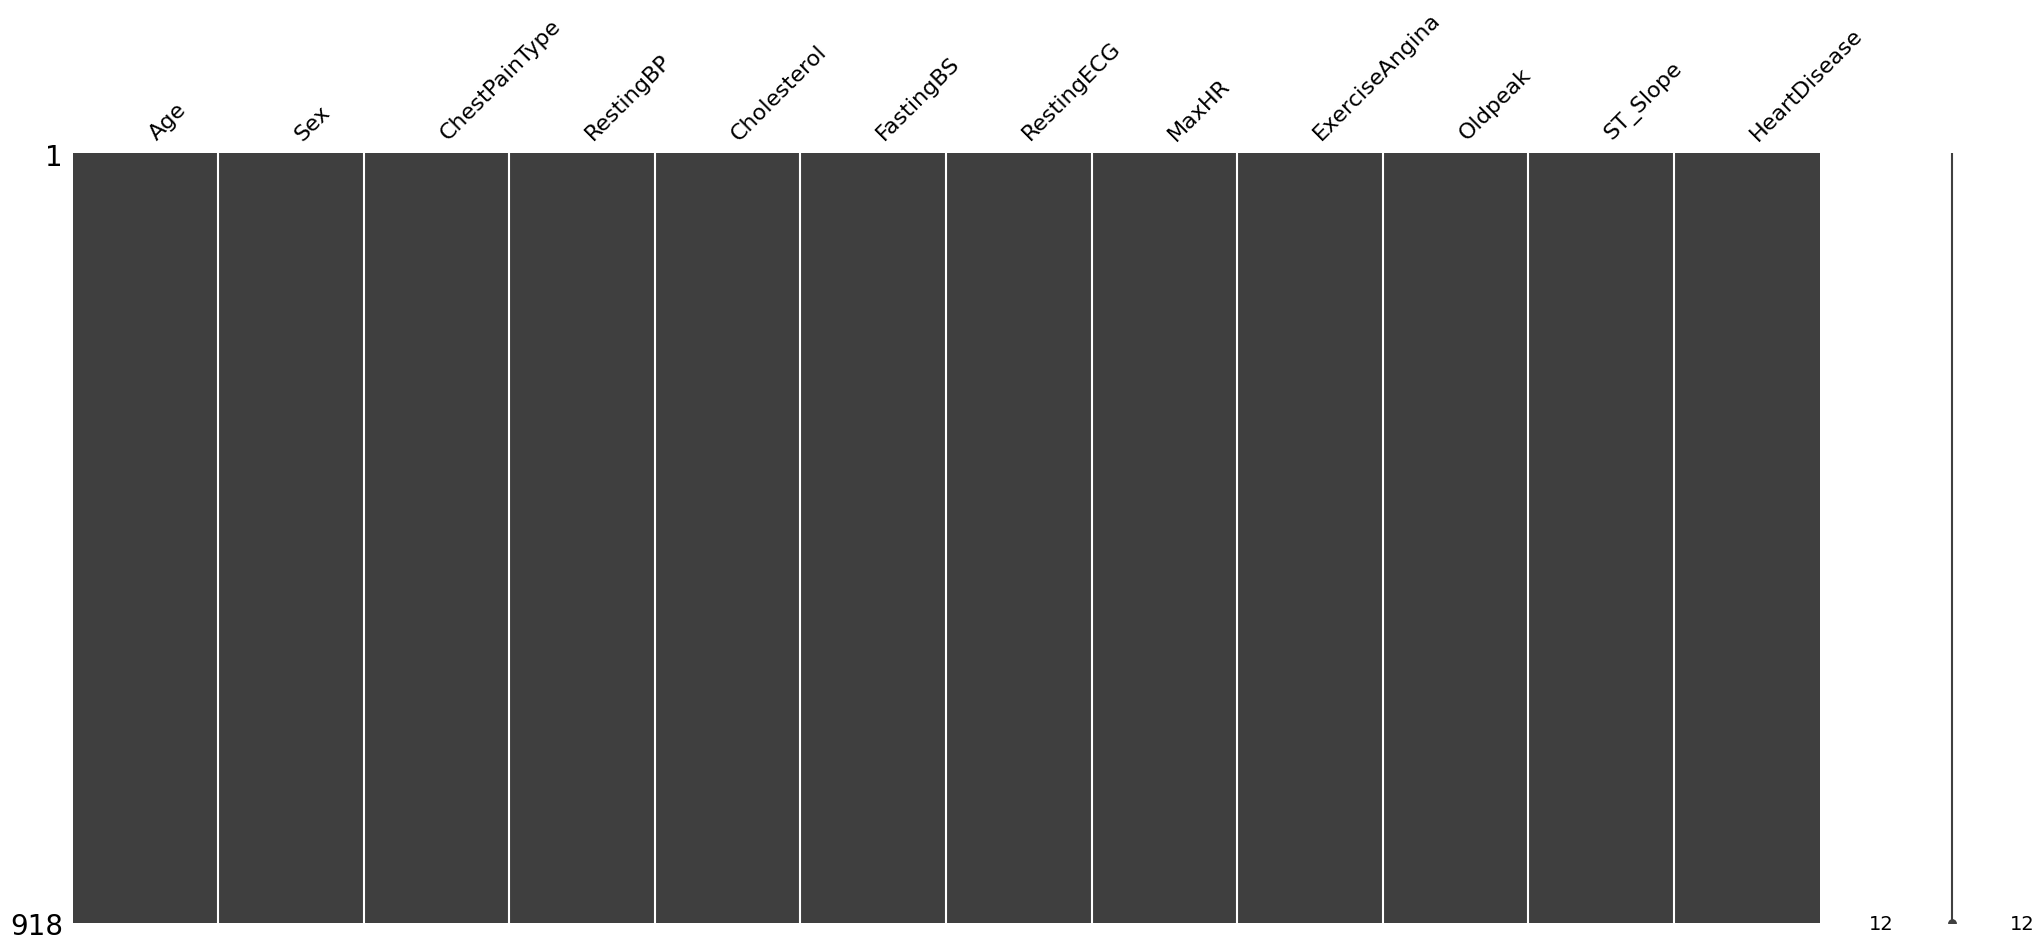

In [16]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [17]:
print(f'We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [19]:
# Convert categorical columns to numeric using one-hot encoding or label encoding
heart_numeric = heart.copy()

# Convert categorical columns to numerical if needed
for col in heart_numeric.select_dtypes(include=['object', 'category']).columns:
    heart_numeric[col] = pd.factorize(heart_numeric[col])[0]  # Label encoding

# Compute correlation
correlation = heart_numeric.corr()['HeartDisease'].abs().to_frame()

# Display the correlation values
print(correlation)


                HeartDisease
Age                    0.282
Sex                    0.305
ChestPainType          0.459
RestingBP              0.108
Cholesterol            0.233
FastingBS              0.267
RestingECG             0.061
MaxHR                  0.400
ExerciseAngina         0.494
Oldpeak                0.404
ST_Slope               0.559
HeartDisease           1.000


# Data train test split

In [20]:
heart.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [21]:
X = heart.drop('HeartDisease',axis=1) 
y = heart['HeartDisease']

In [23]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_invariant=True)
X = encoder.fit_transform(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Standardizing the data by using MinMaxScaler

In [25]:
# scaling dataset with robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.531,0.0,0.333,0.75,0.346,0.0,0.0,0.437,0.0,0.295,0.0
1,0.531,1.0,0.000,0.70,0.548,0.0,0.5,0.563,0.0,0.295,0.0
2,0.551,0.0,0.667,0.66,0.626,0.0,0.0,0.507,1.0,0.432,0.5
3,0.306,1.0,0.333,0.75,0.450,0.0,0.0,0.810,0.0,0.295,0.0
4,0.449,0.0,0.667,0.70,0.410,0.0,0.5,0.563,1.0,0.864,0.5


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.592,1.0,1.000,0.65,0.546,0.0,0.0,0.268,0.0,0.409,0.5
1,0.306,0.0,0.667,0.60,0.310,0.0,0.0,0.423,1.0,0.409,0.5
2,0.245,0.0,0.667,0.60,0.826,1.0,0.0,0.648,1.0,0.409,0.5
3,0.306,0.0,0.667,0.60,0.314,0.0,1.0,0.423,1.0,0.580,0.5
4,0.571,0.0,0.333,0.85,0.000,0.0,1.0,0.444,1.0,0.580,0.5


# Model Building

# RandomForestClassifier

In [26]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.ensemble import RandomForestClassifier
Rm = RandomForestClassifier()
Rm.fit(X_train, y_train)
y_pred_Rm = Rm.predict(X_test)

Rm_train = round(Rm.score(X_train, y_train) * 100, 2)
Rm_accuracy = round(accuracy_score(y_pred_Rm, y_test) * 100, 2)
Rm_f1 = round(f1_score(y_pred_Rm, y_test) * 100, 2)

print("Training Accuracy    :",Rm_train,"%")
print("\033[1m---------------------------------\033[0m")
print("Model Accuracy Score :",Rm_accuracy,"%")

Training Accuracy    : 100.0 %
---------------------------------
Model Accuracy Score : 86.41 %


<div style="color: darkorange;"><b>Accuracy</b> is determining out of all the classifications, how many did we classify correctly?</div>  

<div style="color: teal;">This can be represented mathematically as:</div>  

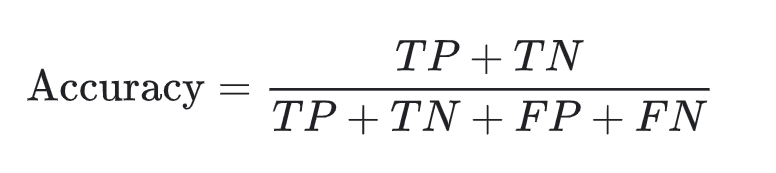

---

<div style="color: darkred;"><h2>Heart Disease</h2></div>

<div style="color: navy;"><h3>Classification Metrics</h3></div>

<div style="color: darkblue;"><h3>Confusion Matrix</h3></div>

<div style="color: purple;">A confusion matrix is a tool for summarizing the performance of a classification algorithm.</div>

<div style="color: darkgreen;">A confusion matrix will give us a clear picture of classification model performance 
and the types of errors produced by the model. It gives us a summary of 
correct and incorrect predictions broken down by each category.</div>

<div style="color: darkblue;">The summary is represented in a tabular form.</div>

---

<div style="color: brown;"><b>Four types of outcomes</b> are possible while evaluating a classification model performance.</div>

<div style="color: blueviolet;">These four outcomes are described below:</div>

---

<div style="color: darkred;"><h3>Confusion Matrix</h3></div>

<div style="color: green;"><b>True Positives (TP)</b> – True Positives occur when we predict an observation belongs 
to a certain class and the observation actually belongs to that class.</div>

<div style="color: blue;"><b>True Negatives (TN)</b> – True Negatives occur when we predict an observation does 
not belong to a certain class and the observation actually does not belong to that class.</div>

<div style="color: red;"><b>False Positives (FP)</b> – False Positives occur when we predict an observation 
belongs to a certain class but the observation actually does not belong to 
that class. This type of error is called <b>Type I error</b>.</div>

<div style="color: orange;"><b>False Negatives (FN)</b> – False Negatives occur when we predict an observation 
does not belong to a certain class but the observation actually belongs to 
that class. This is a very serious error and it is called <b>Type II error</b>.</div>


These four outcomes are summarized in a confusion matrix given below.

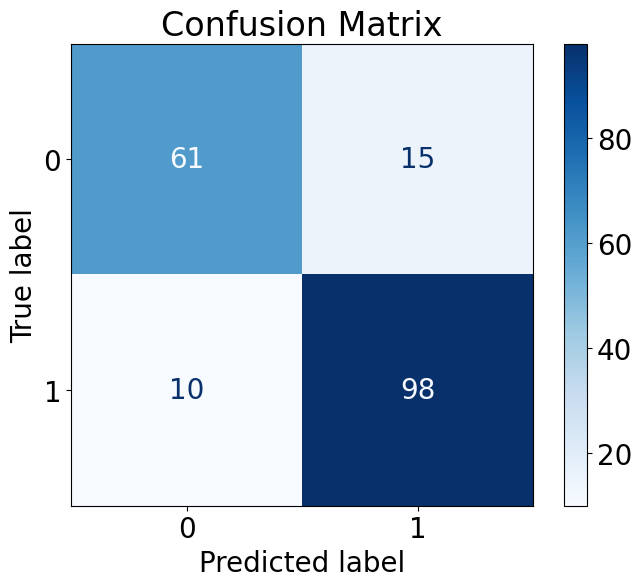

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, Rm.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Choose a color map if needed
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_Rm)

print('Confusion matrix:\n\n', cm)
print("\033[1m-----------------------------\033[0m")
print('\nTrue Positives(TP) = ', cm[0,0])
print("\033[1m-----------------------------\033[0m")
print('\nTrue Negatives(TN) = ', cm[1,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Positives(FP) = ', cm[0,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix:

 [[61 15]
 [10 98]]
-----------------------------

True Positives(TP) =  61
-----------------------------

True Negatives(TN) =  98
-----------------------------

False Positives(FP) =  15
-----------------------------

False Negatives(FN) =  10


<div style="color: green;">The confusion matrix shows <b>59 + 98 = 157</b> correct predictions and <b>10 + 17 = 27</b> incorrect predictions.</div>

<div style="color: blue;"><b>True Positives</b> (Actual Positive:1 and Predict Positive:1) - <b>59</b></div>

<div style="color: purple;"><b>True Negatives</b> (Actual Negative:0 and Predict Negative:0) - <b>98</b></div>

<div style="color: red;"><b>False Positives</b> (Actual Negative:0 but Predict Positive:1) - <b>17</b> (Type I error)</div>

<div style="color: orange;"><b>False Negatives</b> (Actual Positive:1 but Predict Negative:0) - <b>10</b> (Type II error)</div>

---

<div style="color: teal;"><b>Classification Report</b></div>

<div style="color: darkblue;">Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1, and support scores for the model.</div>

<div style="color: brown;">If we want a more comprehensive summary of precision, recall, and f1-score, we can use the <b>classification_report</b> convenience function to compute all three at once and print them in a nice format.</div>

<div style="color: magenta;">The <b>classification_report</b> function produces one line per class (here, True and False) and reports precision, recall, and f-score with this class as the positive class.</div>

<div style="color: darkgreen;">The last column next to the f-score provides the support of each class, which simply means the number of samples in this class according to the ground truth.</div>


<span style="color: blue;">The last row in the classification report shows a weighted (by the number of samples in the class) average of the numbers for each class.</span>


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_Rm))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        76
           1       0.87      0.91      0.89       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# Classification accuracy

In [31]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [32]:
# print classification accuracy

classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Classification accuracy : {0:0.2f}'.format(classification_accuracy),'%')

Classification accuracy : 86.41 %


# Classification error

In [33]:
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')

Classification error : 13.59 %


---

<span style="color: red; font-size: 16px;"><b>Precision</b></span>  
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.  
It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).  

So, Precision identifies the proportion of correctly predicted positive outcomes.  
It is more concerned with the positive class than the negative class.  

Mathematically, precision can be defined as the ratio of TP to (TP + FP).  

### **Confusion Matrix**
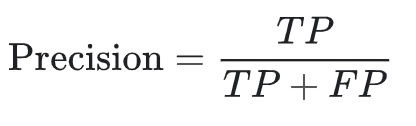  


In [34]:
# precision score

precision = (TP / float(TP + FP)*100)


print('Precision : {0:0.2f}'.format(precision),"%")

Precision : 80.26 %


---

<span style="color: green; font-size: 16px;"><b>Recall</b></span>  
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.  
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).  
Recall is also called **Sensitivity**.  

Recall identifies the proportion of correctly predicted actual positives.  

Mathematically, recall can be given as:  

\[
Recall = {TP}{TP + FN}
\]

### **Recall Formula**
<img src="https://miro.medium.com/max/1044/1*B8FQvNug5B6bfME14N8Www.png" alt="Recall Formula" width="400"/>


In [35]:
# recall score

recall = (TP / float(TP + FN)*100)

print('Recall or Sensitivity : {0:0.2f}'.format(recall),"%")

Recall or Sensitivity : 85.92 %


---

<span style="color: blue; font-size: 16px;"><b>True Positive Rate (TPR)</b></span>  
True Positive Rate is **synonymous with Recall**. It measures the proportion of actual positives correctly identified by the model.  

Mathematically, it is given as:  

\[
TPR ={TP}{TP + FN}
\]

### **True Positive Rate Formula**
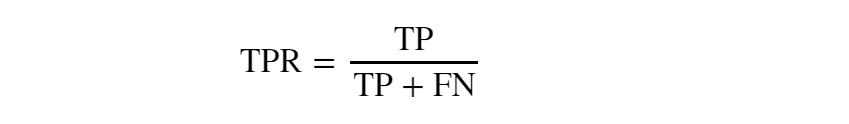


In [36]:
# true_positive_rate

true_positive_rate = (TP / float(TP + FN)*100)

print('True Positive Rate : {0:0.2f}'.format(true_positive_rate),"%")

True Positive Rate : 85.92 %


---

<span style="color: red; font-size: 16px;"><b>False Positive Rate (FPR)</b></span>  
False Positive Rate measures the proportion of actual **negatives** that are incorrectly classified as **positives** by the model.  

Mathematically, it is given as:  

\[
FPR = {FP}{FP + TN}
\]

### **False Positive Rate Formula**
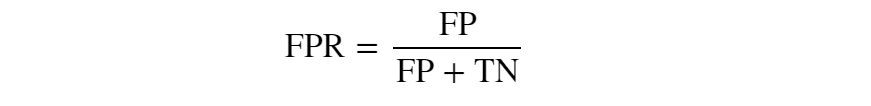


In [37]:
# true_positive_rate

false_positive_rate = (FP / float(FP + TN)*100)

print('False Positive Rate : {0:0.2f}'.format(false_positive_rate),"%")

False Positive Rate : 13.27 %


---

<span style="color: blue; font-size: 18px;"><b>Specificity</b></span>  
Consider the example of a **medical test** for diagnosing a disease.  
<span style="color: green;"><b>Specificity</b></span> relates to the test's ability to correctly reject healthy patients without a condition.  
**Specificity** of a test is the proportion of those who truly **do not** have the condition who test negative for the condition.  

### <span style="color: purple;"><b>Mathematical Representation</b></span>
\[
<span style="color: red;">Specificity = {TN}{TN + FP}</span>
\]

### <span style="color: orange;"><b>Importance of Specificity</b></span>
- A <span style="color: darkcyan;"><b>positive result</b></span> in a test with **high specificity** is useful for **ruling in** disease.
- The test **rarely gives false positives** in healthy patients.
- A **100% specificity** test correctly identifies all patients **without the disease**.
- However, **high specificity** alone **cannot** be used to rule out disease, as it **does not** consider false negatives.

### <span style="color: teal;"><b>Example</b></span>
A test that always returns a **negative result** will have **100% specificity** but would be **useless** for detecting the disease.


In [38]:
# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')

Specificity : 86.73 %


---

<span style="color: blue; font-size: 18px;"><b>Sensitivity</b></span>  
Consider the example of a **medical test** for diagnosing a condition.  
<span style="color: green;"><b>Sensitivity</b></span> refers to the test's ability to correctly detect **ill patients** who have the condition.  

### <span style="color: purple;"><b>Mathematical Representation</b></span>
\[
<span style="color: red;">Sensitivity = {TP}{TP + FN}</span>
\]

### <span style="color: orange;"><b>Importance of Sensitivity</b></span>
- A **negative result** in a **high-sensitivity** test is useful for **ruling out** disease.
- A **100% sensitivity** test detects **all patients with the disease** by testing positive.
- A test with **high sensitivity** is **reliable when negative** since it **rarely misses** actual positive cases.

### <span style="color: teal;"><b>Limitations of Sensitivity</b></span>
- A test with high sensitivity **does not guarantee specificity**.
- **False positives** are not considered in sensitivity calculation.
- A **bogus test** that always returns **positive** has **100% sensitivity** but is **useless** in detecting the disease.

### <span style="color: darkcyan;"><b>Handling Indeterminate Results</b></span>
- If test results are **indeterminate**, they **should be excluded** when quoting sensitivity.
- Alternatively, **treating indeterminate cases as false negatives** gives a **worst-case estimate**.

### <span style="color: brown;"><b>Relationship with Type II Errors</b></span>
A test with **higher sensitivity** has a **lower Type II error** rate.


In [39]:
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Specificity : {0:0.2f}'.format(Sensitivity),"%")

Specificity : 85.92 %


---
<span style="color: blue; font-size: 18px;"><b>F1 Score</b></span>

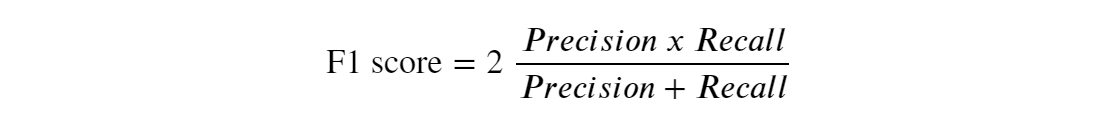

### <span style="color: green;"><b>Definition</b></span>
F1-score is defined as the **harmonic mean** between **Precision** and **Recall**. It is used as a **statistical measure** to evaluate performance.  
The F1-score ranges from **0 to 1**, where:
- **0** = worst performance  
- **1** = best performance  

F1-score is a **mean of an individual’s performance** based on **two factors**:
- **Precision** (Correctness of positive predictions)
- **Recall** (Coverage of actual positives)

### <span style="color: purple;"><b>Mathematical Formula</b></span>
\[
<span style="color: red;">F1 = 2 \times {Precision \times Recall}{Precision + Recall}</span>
\]

### <span style="color: orange;"><b>What Does F1 Score Mean?</b></span>
- **Precision** is the accuracy of judgment.
- **Recall** is identifying all relevant instances.

**Example:**
- Suppose in a **population sample of 100 people**, a classifier estimates **70 males**.
- If the **actual count is 70**, precision is **100%**.
- However, if the classifier **only identifies 56 out of 70 males**, recall is **80%**.
- The **F1-score** provides a **balanced** measure between **precision & recall**.

### <span style="color: teal;"><b>Importance of F1 Score</b></span>
- It **balances precision and recall** in one metric.
- Useful in **imbalanced datasets** where accuracy alone is misleading.
- **Higher F1-score** means a **better classifier**.

### <span style="color: darkcyan;"><b>Theory Behind F1 Score</b></span>
- Also known as **F-measure** or **Balanced F-score**.
- Used in **classification models** to assess their reliability.
- A model with a **high F1-score** is **good at both precision & recall**.
- Unlike accuracy, **F1-score is effective for imbalanced datasets**.

### <span style="color: brown;"><b>Rule of Thumb for F1 Scores</b></span>
- **0.9 – 1.0** → **Excellent model**  
- **0.8 – 0.9** → **Very good model**  
- **0.7 – 0.8** → **Good model**  
- **0.6 – 0.7** → **Fair model**  
- **Below 0.6** → **Needs improvement**  



In [40]:
# f1 score

Rm_f1_score = round(f1_score(y_pred_Rm, y_test) * 100)
print('f1 Score : ',Rm_f1_score,"%")

f1 Score :  89 %



---

### <span style="color: green;"><b>ROC Curve</b></span>
**ROC Curve (Receiver Operating Characteristic)** is a **graphical representation** that evaluates a classification model's performance.

The **X-axis** represents the **False Positive Rate (1 - Specificity)**  
The **Y-axis** represents the **True Positive Rate (Sensitivity/Recall)**  

- As the **threshold** of classification changes, the **ROC curve shifts**.
- The **closer the curve is to the top-left corner**, the **better the classifier** is at distinguishing between classes.

---

### <span style="color: purple;"><b>Area Under the ROC Curve (AUC-ROC)</b></span>
AUC (**Area Under the Curve**) measures how well a model can distinguish between classes.  
- **Higher AUC → Better model** at predicting **0s as 0s and 1s as 1s**.  
- AUC is particularly useful for **imbalanced datasets**.  

In medical applications:
- A **higher AUC** means the model is better at distinguishing between **patients with disease** vs **healthy individuals**.

---



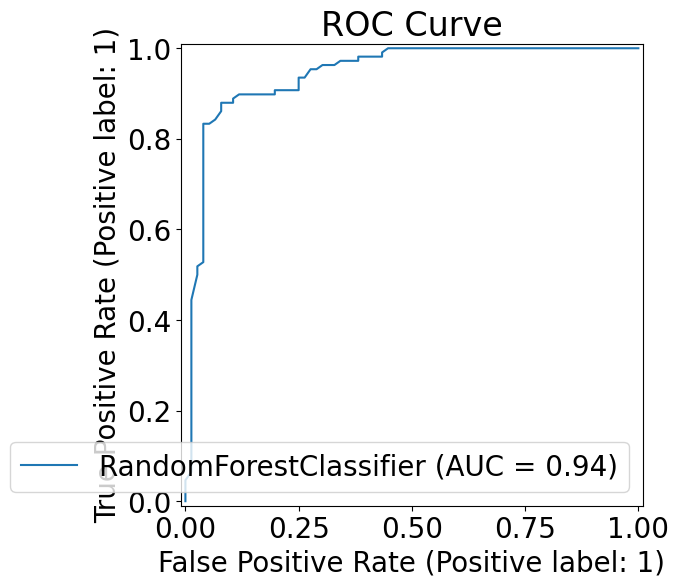

In [43]:
from sklearn.metrics import RocCurveDisplay

# Assuming Rm is your trained model and X_test, y_test are your test data
RocCurveDisplay.from_estimator(Rm, X_test, y_test)

# Add title
plt.title('ROC Curve')
plt.show()


# <span style="color:#FF5733;">Precision-Recall Curve</span>

There are numerous ways to evaluate the performance of a classifier. In this article, we introduce the **Precision-Recall Curve** and further examine the difference between two popular performance reporting methods: **Precision-Recall (PR) Curve** and **Receiver Operating Characteristic (ROC) Curve**.

## <span style="color:#3498DB;">What is a PR Curve?</span>

A **PR curve** is simply a graph with **Precision values on the y-axis** and **Recall values on the x-axis**. In other words, the PR curve contains:

- **Precision (TP / (TP + FP))** on the y-axis  
- **Recall (TP / (TP + FN))** on the x-axis  

## <span style="color:#2ECC71;">Important Terminology</span>

- **Precision** is also called **Positive Predictive Value (PPV)**  
- **Recall** is also called **Sensitivity, Hit Rate, or True Positive Rate (TPR)**  

## <span style="color:#F1C40F;">Interpreting a PR Curve</span>

It is desired that the algorithm should have **both high precision and high recall**. However, most machine learning algorithms often involve a **trade-off** between the two.

A **good PR curve** has **greater AUC (Area Under Curve)**.  
In the figure above:
- The classifier corresponding to the **Orange Line** has **better performance** than other classifiers.  
- The classifier with a **higher AUC on the ROC curve** will always have a **higher AUC on the PR curve** as well.



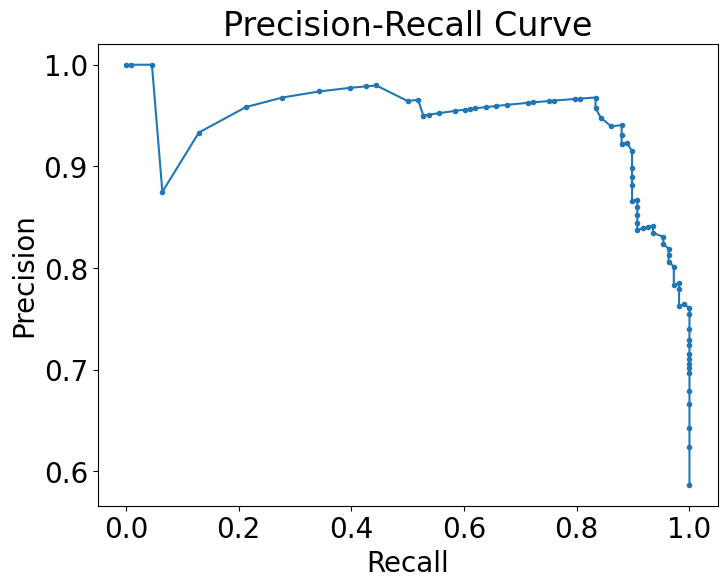

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_scores = Rm.predict_proba(X_test)[:, 1]  

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
